In [1]:
import time

import numpy as np
import mediapipe as mp
import cv2

In [62]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face connections

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [63]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        ret, frame = cap.read()
        if not ret:
            print('Failed to capture frame')
            exit(1)
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        cv2.imshow('frame', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [4]:
lh = np.array([[res.x, res.y, res.visibility] for res in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros(21*3)
lh[0]

0.0

In [45]:
def plot(x, y):
    import matplotlib.pyplot as plt

    # plot the left hand landmarks
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x, y, marker='o', s=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Left Hand Landmarks')

    # make the scale of the plot consistent
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    plt.show()

In [6]:
lh = np.array([[res.x, res.y, res.visibility] for res in results.pose_landmarks.landmark if res.visibility]) if results.pose_landmarks else np.zeros(33*4)
lh

array([[5.99858344e-01, 5.38756549e-01, 9.99885380e-01],
       [6.34138584e-01, 4.57614452e-01, 9.99822676e-01],
       [6.51994586e-01, 4.58739430e-01, 9.99743640e-01],
       [6.67825341e-01, 4.60235238e-01, 9.99694765e-01],
       [5.63703835e-01, 4.57632542e-01, 9.99857485e-01],
       [5.36697745e-01, 4.57252413e-01, 9.99867022e-01],
       [5.10697365e-01, 4.58497196e-01, 9.99900162e-01],
       [6.91821456e-01, 4.96258825e-01, 9.99680638e-01],
       [4.79815722e-01, 4.99507248e-01, 9.99912202e-01],
       [6.41012609e-01, 6.25074506e-01, 9.99841511e-01],
       [5.49253583e-01, 6.25500262e-01, 9.99907255e-01],
       [8.82366180e-01, 9.30064201e-01, 9.91953671e-01],
       [3.37680131e-01, 9.23917949e-01, 9.97922421e-01],
       [1.04666412e+00, 1.42975211e+00, 2.16867641e-01],
       [2.98036437e-04, 1.33494699e+00, 9.35925424e-01],
       [1.03391659e+00, 1.71672654e+00, 2.11178929e-01],
       [1.44704491e-01, 8.90267551e-01, 9.34363425e-01],
       [1.05351102e+00, 1.83214

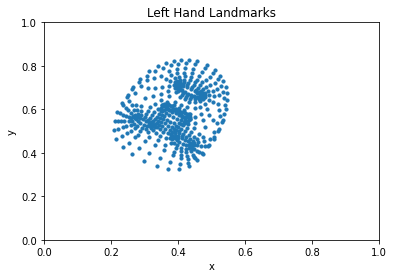

In [64]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]) if results.face_landmarks else np.zeros(468*3)
plot(face[:,0], face[:,1])

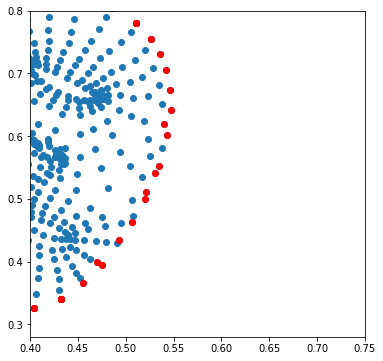

In [65]:
x_min = np.min(face[:,0])
x_max = np.max(face[:,0])
y_min = np.min(face[:,1])
y_max = np.max(face[:,1])

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()

# plot a rectangle around the face
ax.plot(face[:,0], face[:,1], 'o')

closest_points = []

for y in np.linspace(y_min,y_max,20):
    closest_points.append(np.argmin(np.abs(face[:,0] - x_min) + np.abs(face[:,1] - y)))
    closest_points.append(np.argmin(np.abs(face[:,0] - x_max) + np.abs(face[:,1] - y)))

for x in np.linspace(x_min,x_max,20):
    closest_points.append(np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y_max)))
    closest_points.append(np.argmin(np.abs(face[:,0] - x) + np.abs(face[:,1] - y_min)))

for i in closest_points:
    plt.plot(face[i,0], face[i,1], 'o', color='r')

plt.xlim(.40, 0.75)
plt.ylim(0.28, 0.8)
plt.show()

In [66]:
np.array([[face[i,0], face[i,1]] for i in closest_points]).flatten().shape


(160,)